### Home Assignment 7
---

First you must run the following cell as usual.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import cvxpy as cp

**Task 1**: Load the market cap data you created in Homework Assignment 6 and compute $\mu$ (`Mu`) and $\Sigma$ (`Sigma`).

In [2]:
marketcap = pd.read_csv('Stocks.csv', index_col=0)
R = (marketcap.diff()/marketcap.shift(1))[1:] * 100
Mu = R.mean().values
Sigma = R.cov().values

**Task 2**: Define the minimum variance portfolio problem and draw the efficient frontier. You do not need to edit the following cells. Just run them.

In [3]:
Weight = cp.Variable(Mu.shape[0])
Target_Return = cp.Parameter()
Risk_Variance = cp.quad_form(Weight, Sigma)
Opt_Portfolio = cp.Problem(cp.Minimize(Risk_Variance),
                           [Weight.T @ Mu == Target_Return,
                            cp.sum(Weight) == 1.0,
                            Weight >= 0.0])

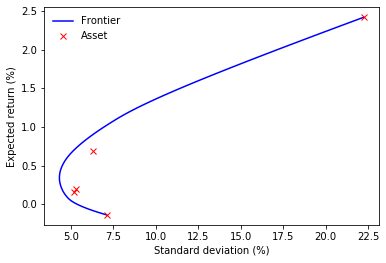

In [6]:
V_Target = np.linspace(Mu.min(), Mu.max(), num=100)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cp.OSQP)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(V_Risk, V_Target, 'b-')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['Frontier', 'Asset'], loc='best', frameon=False)
plt.xlabel('Standard deviation (%)')
plt.ylabel('Expected return (%)')
plt.show()

**Task 3**: Define the minimum variance portfolio problem without the short selling constraint.

*Hint* Copy the third cell here and edit out the short selling constraint.

In [6]:
Weight = cp.Variable(Mu.shape[0])
Target_Return = cp.Parameter()
Risk_Variance = cp.quad_form(Weight, Sigma)
Opt_Portfolio = cp.Problem(cp.Minimize(Risk_Variance),
                           [Weight.T @ Mu == Target_Return,
                            cp.sum(Weight) == 1.0,
                            ])

**Task 4**: Redraw the minimum variance frontier without the short selling constraint.

*Hint* To make a nice plot of the minimum variance frontier, you may have to tweak the range of `V_Target`.

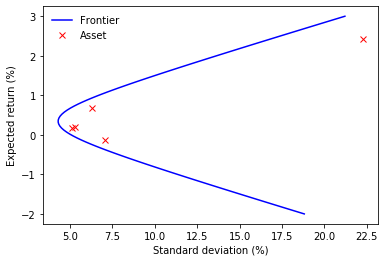

In [13]:
V_Target = np.linspace(-2.0, 3.0, num=100)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cp.OSQP)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(V_Risk, V_Target, 'b-')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['Frontier', 'Asset'], loc='best', frameon=False)
plt.xlabel('Standard deviation (%)')
plt.ylabel('Expected return (%)')
plt.show()